<a href="https://colab.research.google.com/github/NadeefChowdhury/Tensorflow_4_MNIST/blob/main/Tensorflow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
single_image = X_train[0]

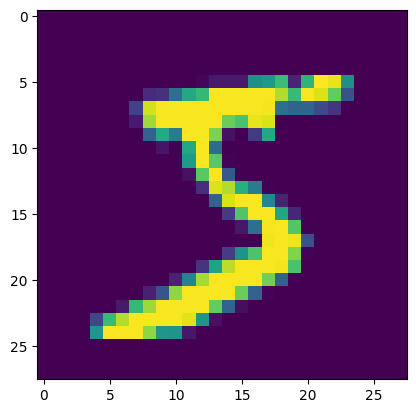

In [9]:
plt.imshow(single_image)

In [10]:
from tensorflow.keras.utils import to_categorical

In [40]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train = X_train.reshape(60000,28,28,1)

In [15]:
X_test.shape


(10000, 28, 28)

In [16]:
X_test = X_test.reshape(10000,28,28,1)

In [17]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [59]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping


In [31]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [60]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 92s 23ms/step - loss: 0.1411 - accuracy: 0.9578 - val_loss: 0.0591 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0458 - accuracy: 0.9860 - val_loss: 0.0462 - val_accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0375 - val_accuracy: 0.9875
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0350 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0404 - val_accuracy: 0.9882


In [61]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

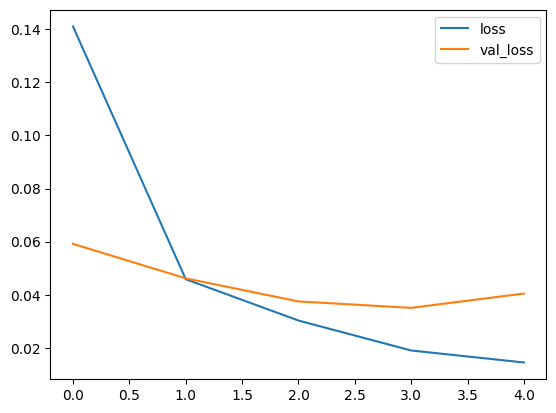

In [62]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

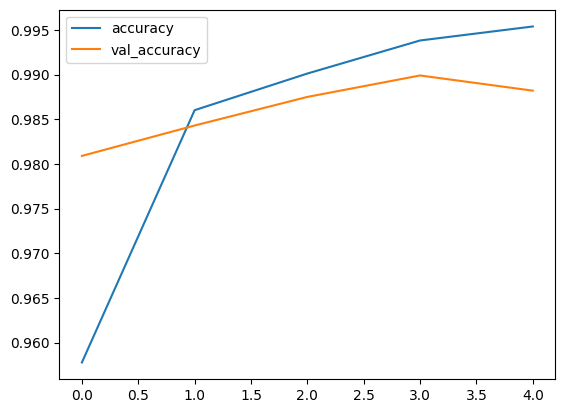

In [63]:
metrics[['accuracy', 'val_accuracy']].plot()

In [64]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

313/313 [==============================] - 3s 9ms/step


In [67]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_cat_test, predictions))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
